Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
airbnb_2 <- airbnb[c(
'City','Room.Type','Neighbourhood','Accommodates','Bathrooms',
'Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating',
'Latitude', 'Longitude')]

In [3]:
head(airbnb_2)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Madrid,Entire home/apt,,2,1.0,0,1,50,NA,2,15,96,40.40745,-3.707995
2,Madrid,Entire home/apt,,4,1.0,1,2,50,NA,2,25,81,40.40832,-3.705006
3,Madrid,Entire home/apt,,4,1.5,1,2,77,NA,1,0,89,40.41372,-3.706823
4,Madrid,Entire home/apt,Embajadores,2,1.0,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Madrid,Entire home/apt,Embajadores,5,1.0,2,4,95,NA,4,0,97,40.41256,-3.701155
6,Madrid,Entire home/apt,La Latina,4,1.0,1,2,69,NA,2,18,91,40.40791,-3.705095


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [4]:
df_madrid <- subset(airbnb_2, Room.Type=="Entire home/apt")
df_madrid <- subset(df_madrid, City=="Madrid")
df_madrid <- subset(df_madrid, !Neighbourhood == "",)
df_madrid <- df_madrid[ -c(1,2) ]
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
4,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155
6,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095
9,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281
10,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019
15,La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [5]:
df_madrid$Square.Meters <- df_madrid$Square.Feet*0.092903

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [6]:
summary(df_madrid$Square.Meters == "NA")

   Mode   FALSE    NA's 
logical     347    5254 

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [7]:
summary(df_madrid$Square.Meters == 0)

   Mode   FALSE    TRUE    NA's 
logical     219     128    5254 

Reemplazar todos los 0m^2 por NA 

In [8]:
df_madrid$Square.Meters[df_madrid$Square.Meters == 0] <- NA 
summary(df_madrid$Square.Meters)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  2.044  30.008  49.982  57.788  74.973 480.030    5382 

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Warning message:
“Removed 5382 rows containing non-finite values (stat_density).”


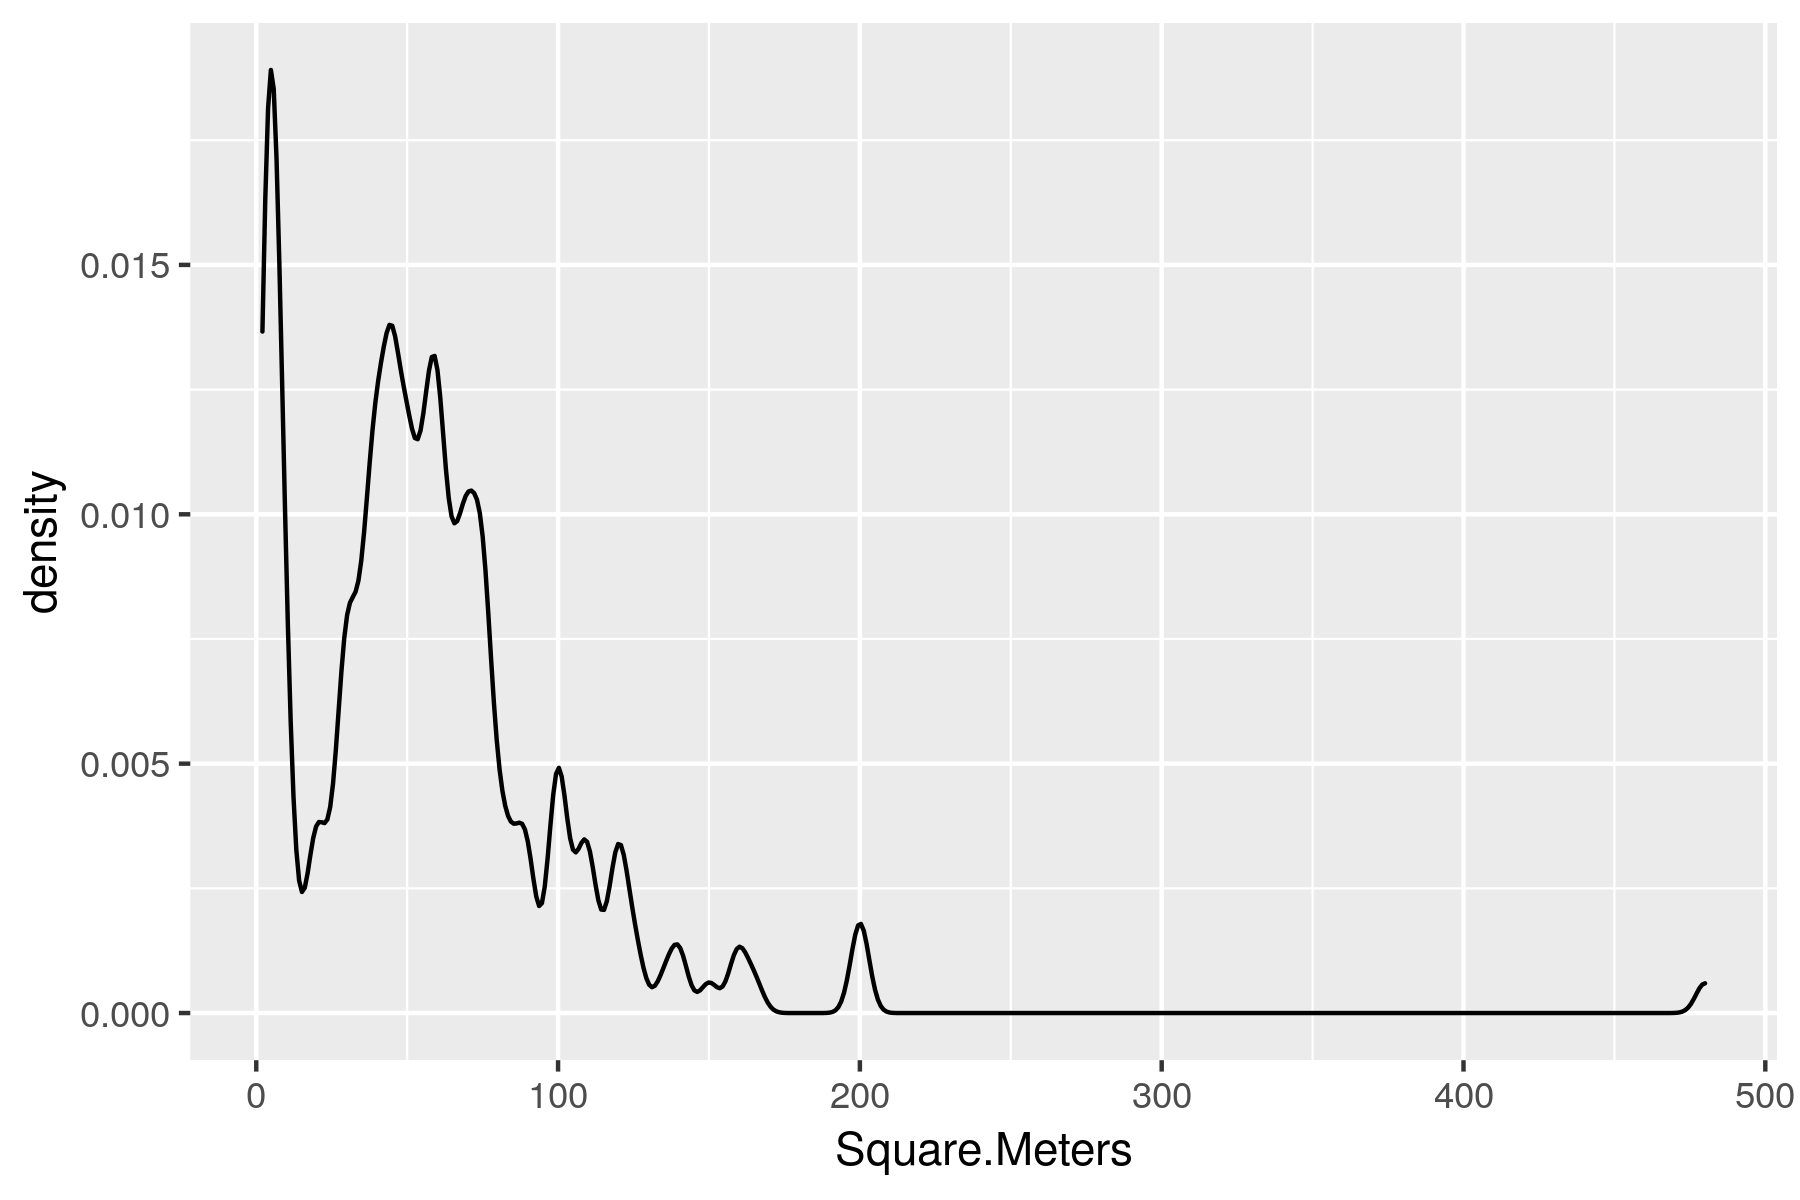

In [9]:
library(ggplot2)
ggplot(df_madrid,aes(x=Square.Meters))+geom_density(bw=3)

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [10]:
df_madrid$Square.Meters[df_madrid$Square.Meters < 20] <- NA 
df_madrid_na <- df_madrid #dataframes con na para ser reemplazado por el modelo que indican mas adelante

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [11]:
df_madrid <- subset(df_madrid, !is.na(Square.Meters))

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

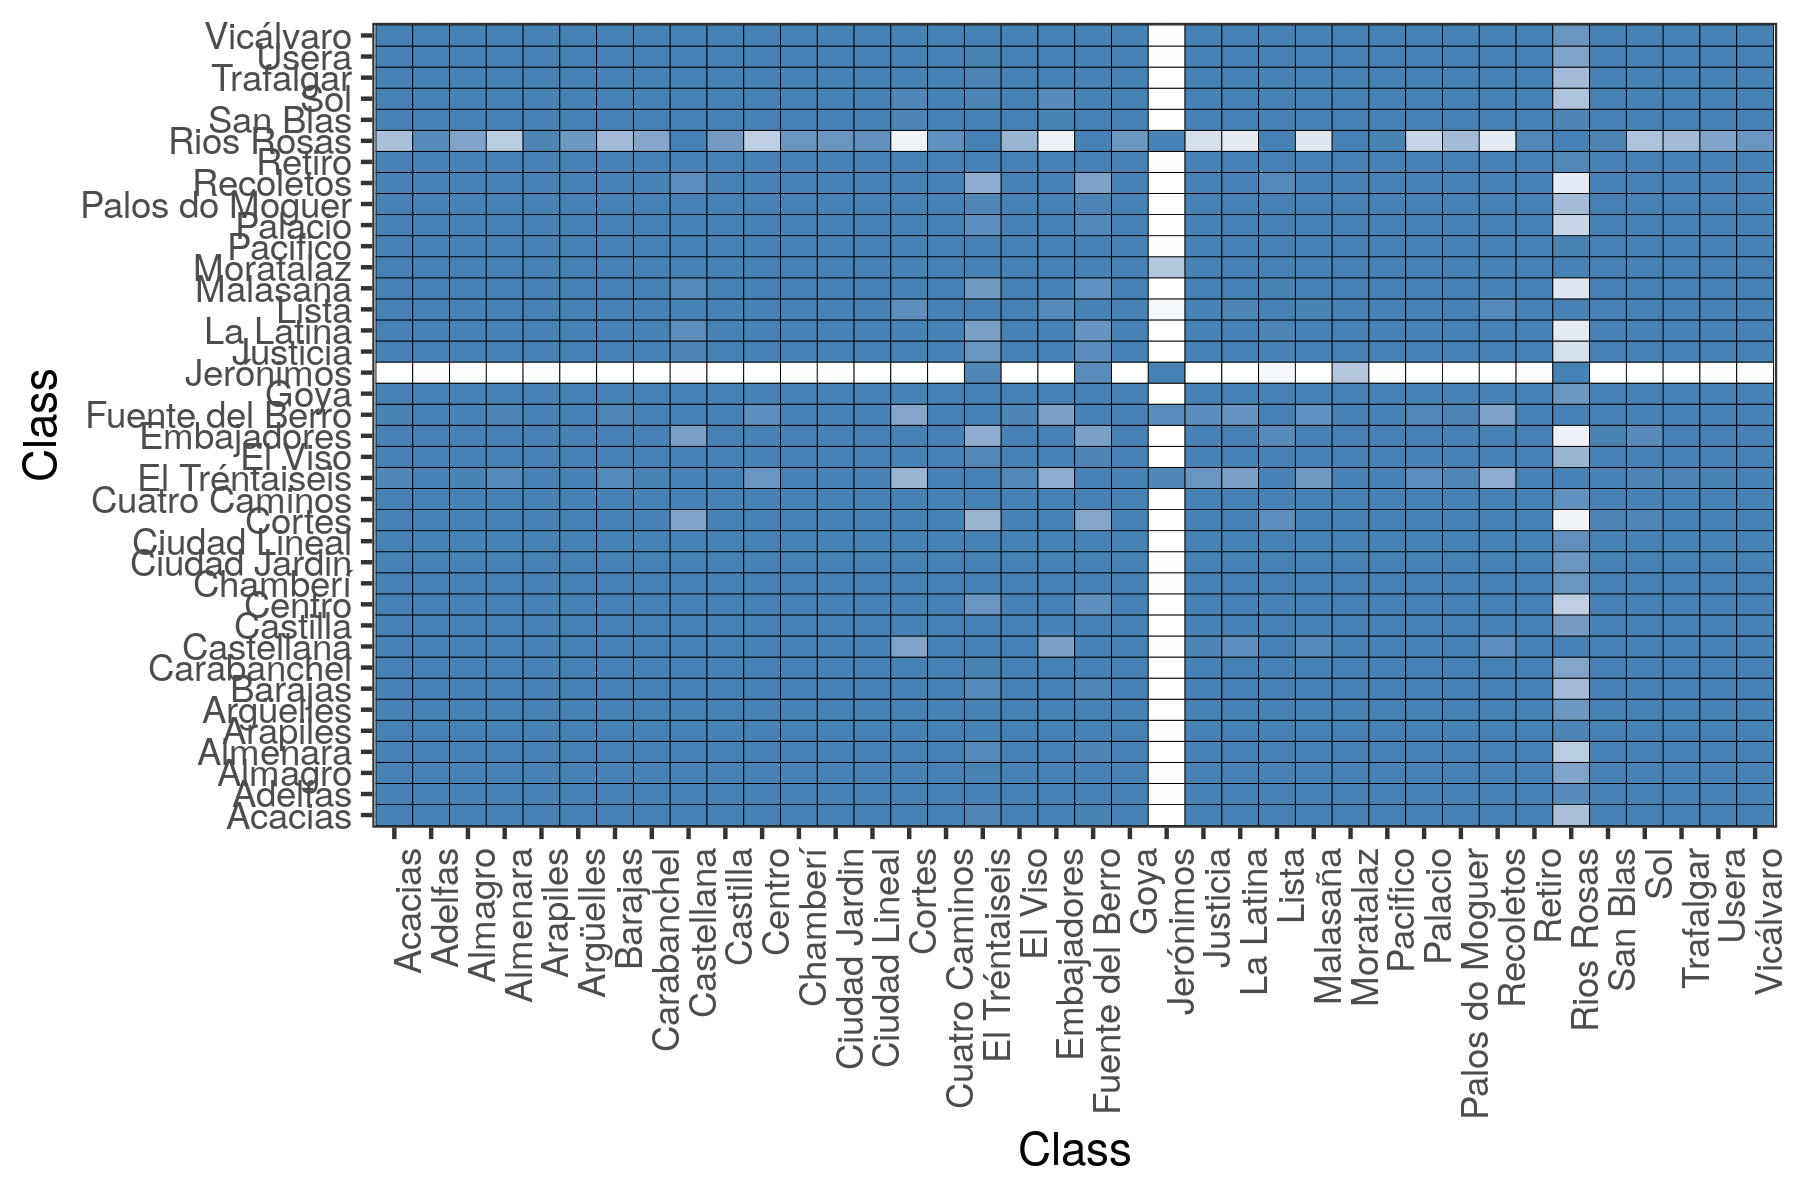

In [12]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


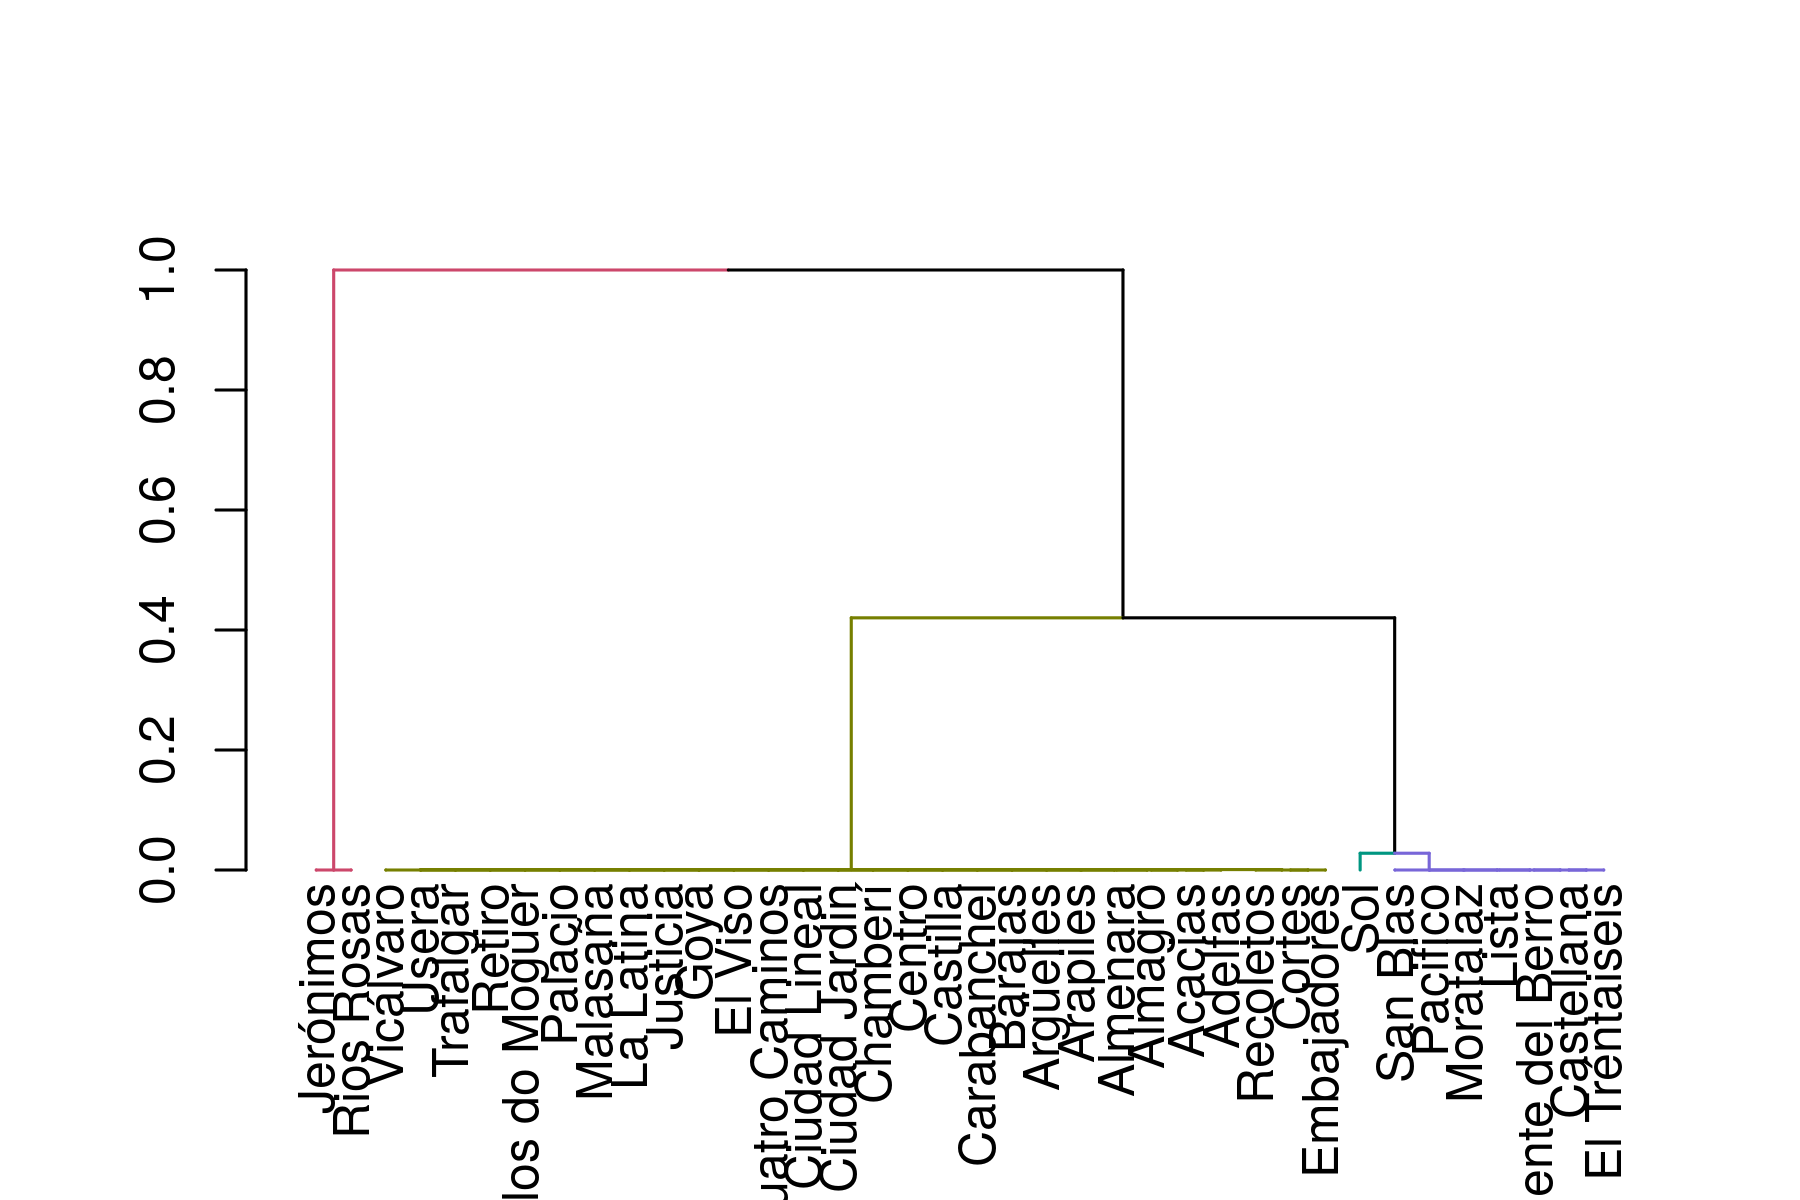

In [13]:
suppressPackageStartupMessages(library(dendextend))
df_madrid.dist <- as.dist(1-resm)
df_madrid.tree <- hclust(df_madrid.dist, method="complete")
df_madrid.dend <- as.dendrogram(df_madrid.tree) 
clusters <- cutree(df_madrid.dend, k=4)
plot(color_branches(df_madrid.dend, k=4))

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

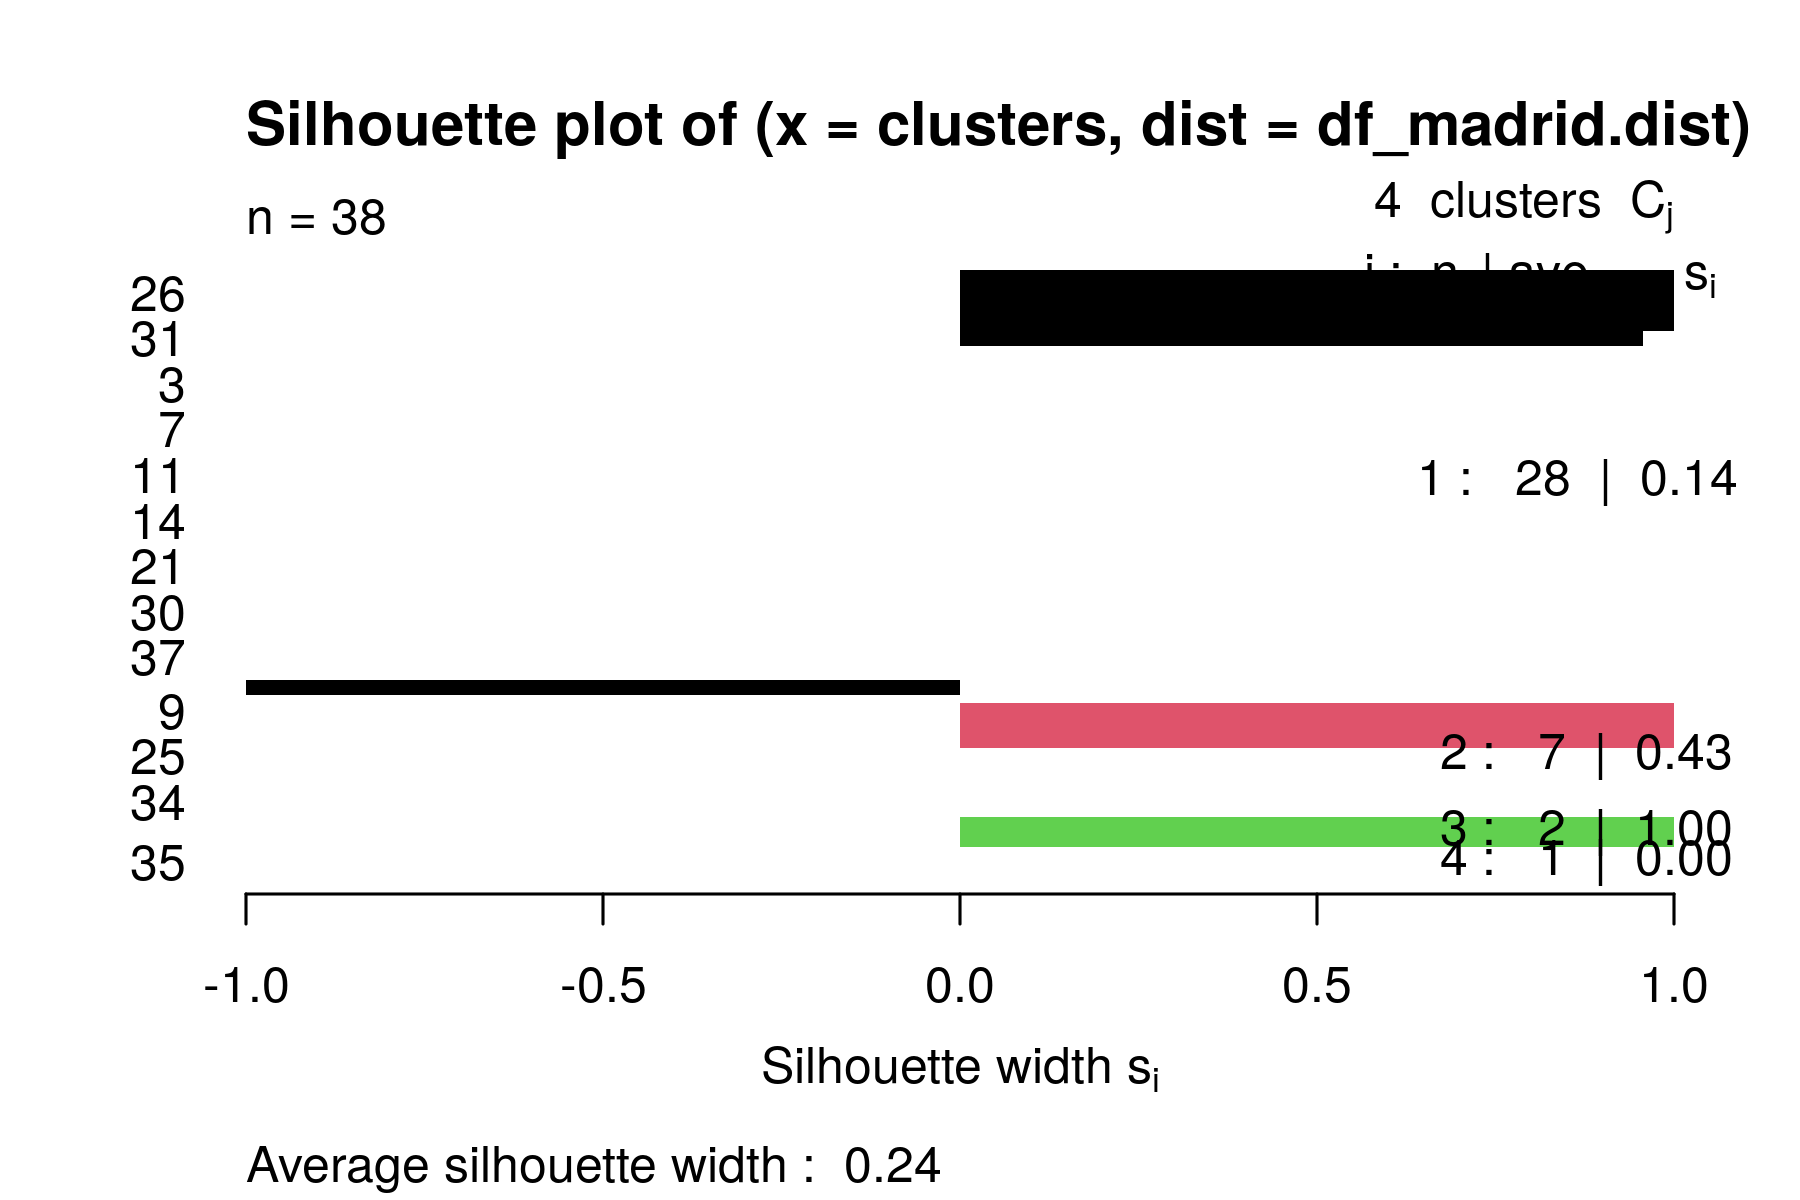

In [14]:
library(cluster)
ss <- silhouette(clusters, df_madrid.dist)
plot(ss, col=1:max(clusters), border=NA)

In [15]:
clusters

Acacias          Adelfas          Almagro         Almenara 
               1                1                1                1 
        Arapiles        Argüelles          Barajas      Carabanchel 
               1                1                1                1 
      Castellana         Castilla           Centro         Chamberí 
               2                1                1                1 
   Ciudad Jardin    Ciudad Lineal           Cortes   Cuatro Caminos 
               1                1                1                1 
  El Tréntaiseis          El Viso      Embajadores Fuente del Berro 
               2                1                1                2 
            Goya        Jerónimos         Justicia        La Latina 
               1                3                1                1 
           Lista         Malasaña        Moratalaz         Pacifico 
               2                1                2                2 
         Palacio  Palos do Moguer        Recoletos           Retiro 
               1                1                1                1 
      Rios Rosas         San Blas              Sol        Trafalgar 
               3                2                4                1 
           Usera        Vicálvaro 
               1                1

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [16]:
df_madrid <- merge(df_madrid, clusters)
names(df_madrid)[names(df_madrid) == "y"] <- "neighb_id"

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [17]:
idx <- sample(1:nrow(df_madrid), nrow(df_madrid)*0.7)
df_madrid.train <- df_madrid[idx,]
df_madrid.test  <- df_madrid[-idx,]

In [18]:
model_df<-lm(Square.Meters~Bedrooms+Bathrooms+Beds+Price+Accommodates+neighb_id,data=df_madrid.train)
summary(model_df)


Call:
lm(formula = Square.Meters ~ Bedrooms + Bathrooms + Beds + Price + 
    Accommodates + neighb_id, data = df_madrid.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-102.070  -12.075   -0.917    9.936  192.936 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -8.309332   1.267451  -6.556 6.15e-11 ***
Bedrooms     10.754395   0.660281  16.288  < 2e-16 ***
Bathrooms    30.763709   0.948425  32.437  < 2e-16 ***
Beds          3.512630   0.444065   7.910 3.21e-15 ***
Price         0.056301   0.006385   8.818  < 2e-16 ***
Accommodates  1.323664   0.404880   3.269  0.00109 ** 
neighb_id     0.420051   0.552235   0.761  0.44691    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.42 on 4506 degrees of freedom
  (115 observations deleted due to missingness)
Multiple R-squared:  0.6735,	Adjusted R-squared:  0.673 
F-statistic:  1549 on 6 and 4506 DF,  p-value: < 2.2e-16


Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

In [19]:
df_madrid.test$pred_sqm <- predict(model_df, df_madrid.test)
df_madrid.test$residual <- df_madrid.test$Square.Meters - df_madrid.test$pred_sqm
#head(df_madrid.test) #se muestra que la linea anterior funcionó
#df_madrid.test$residual <- model_df$residuals #abajo no funciona, tiene el mismo error como si no usará la resta

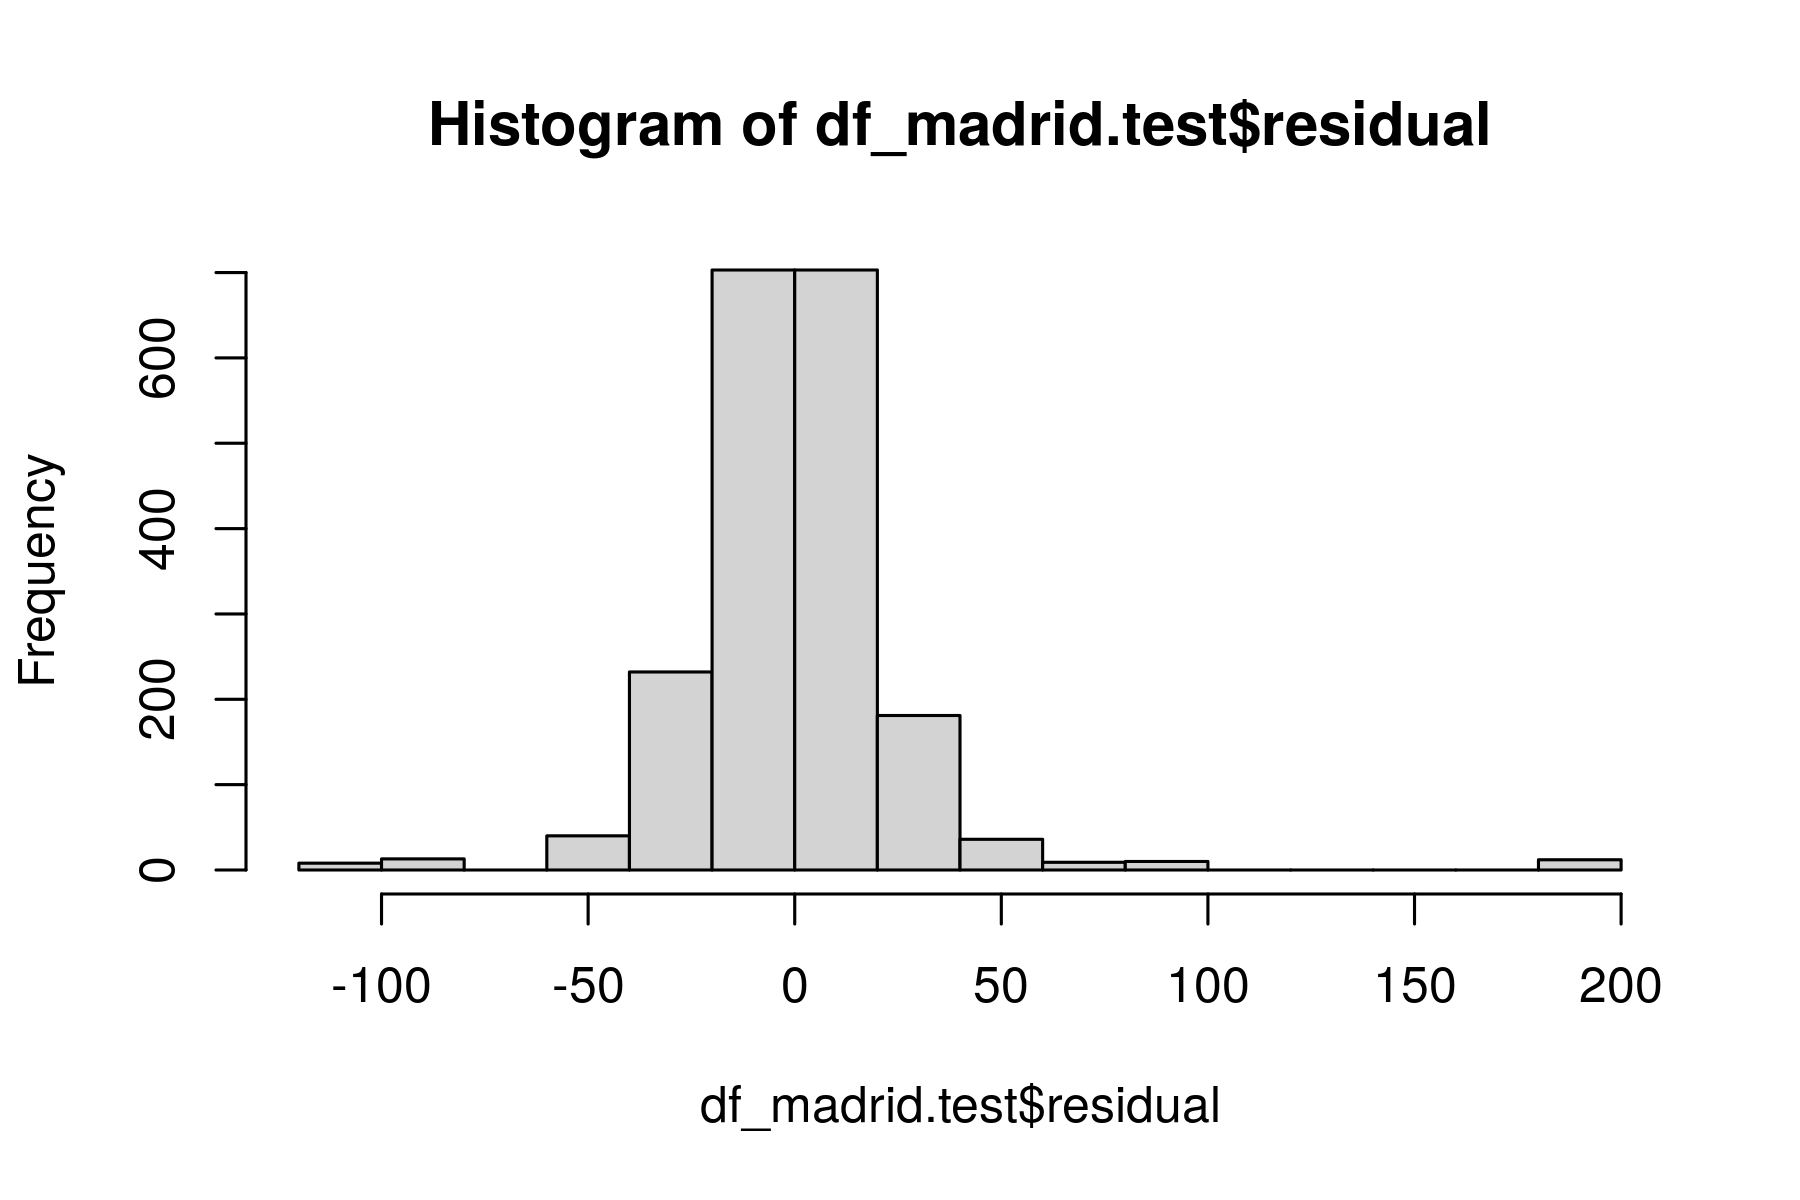

In [20]:
hist(df_madrid.test$residual)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [21]:
test1 <- predict(model_df, data.frame(Accommodates=6, Bedrooms=3, Bathrooms=1, Beds=3, Price=80, neighb_id=1))
paste("Metros Cuadrados para 3 habitaciones, 3 camas", test1)
test2 <- predict(model_df, data.frame(Accommodates=6, Bedrooms=4, Bathrooms=1, Beds=4, Price=80, neighb_id=1))
paste("Metros Cuadrados para 4 habitaciones, 4 camas", test2)
test3 <- predict(model_df, data.frame(Accommodates=6, Bedrooms=5, Bathrooms=1, Beds=5, Price=80, neighb_id=1))
paste("Metros Cuadrados para 5 habitaciones, 5 camas", test2) 
#NO VARIA CON RESPECTO AL ANTERIOR, QUIZAS EXISTA UN LIMITE EN LOS DATOS

[1] "Metros Cuadrados para 3 habitaciones, 3 camas 78.1215876264512"

[1] "Metros Cuadrados para 4 habitaciones, 4 camas 92.388612533678"

[1] "Metros Cuadrados para 5 habitaciones, 5 camas 92.388612533678"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [22]:
library(dplyr)
df_madrid_predict <- df_madrid %>% 
  mutate(pred = predict(model_df, df_madrid)) %>%
  mutate(Square.Meters = ifelse(is.na(Square.Meters), pred, Square.Meters))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [24]:
df_madrid.pca <- prcomp(df_madrid[,c(2,5,7:9,11:14)], center = TRUE,scale. = TRUE)
summary(df_madrid.pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.9391 1.1844 1.0000 0.9981 0.86061 0.75654 0.62278
Proportion of Variance 0.4178 0.1559 0.1111 0.1107 0.08229 0.06359 0.04309
Cumulative Proportion  0.4178 0.5736 0.6848 0.7955 0.87776 0.94135 0.98444
                           PC8       PC9
Standard deviation     0.37417 9.037e-16
Proportion of Variance 0.01556 0.000e+00
Cumulative Proportion  1.00000 1.000e+00

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?